In [45]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
import time # for timing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting

import tensorflow as tf
from sklearn.model_selection import train_test_split # preprocessing datasets
from tensorflow.keras.preprocessing.text import Tokenizer # text preprocessing
from tensorflow.keras.models import Sequential # modeling neural networks
from tensorflow.keras.layers import Dense, Activation # layers for neural networks
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score # final metrics
import plotly.express as px
import seaborn as sns 

In [46]:
vect = CountVectorizer()
train = pd.read_csv (r'/content/drugsComTrain_raw.tsv', sep='\t')
test = pd.read_csv (r'/content/drugsComTest_raw.tsv', sep='\t')

vect.fit(train)
traindata = vect.transform(train)
traindata.toarray()

array([[0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1]])

In [47]:
train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



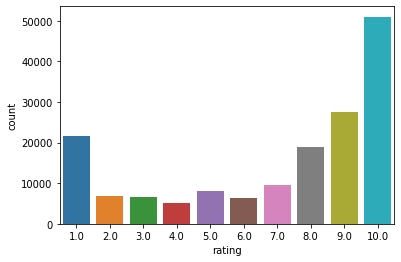

In [49]:
sns.countplot(train.rating)

In [50]:


count_df = train[['condition','review']].groupby('condition').aggregate({'review':'count'}).reset_index().sort_values('review',ascending=False)
count_df.head()
px.bar(count_df[count_df['review']>3000],x='condition',y='review')

In [51]:
#naive bayes
model = Sequential()
model.add(Dense(256, input_dim = 5000)) # Remember to change the input_dim if you use more words
model.add(Activation('relu'))
model.add(Dense(32)) # Hidden layer
model.add(Activation('relu'))
model.add(Dense(3)) # Output layer has three categories
model.add(Activation('softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               1280256   
                                                                 
 activation_12 (Activation)  (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 32)                8224      
                                                                 
 activation_13 (Activation)  (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 3)                 99        
                                                                 
 activation_14 (Activation)  (None, 3)                 0         
                                                                 
Total params: 1,288,579
Trainable params: 1,288,579
No